In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('ticks')
COLOR_PALETTE = 'Set1'
sns.set_palette(COLOR_PALETTE)

In [2]:
import string
random = np.random.RandomState(11116)
n_points = 30
data = random.randn(n_points, 2)

def random_word(length):
    letters = list(string.ascii_lowercase)
    letters_and_spaces = letters + [' ']
    
    if length < 3:
        label = ''.join(random.choice(letters, size=length))
    else:
        label = random.choice(letters)
        # allow spaces but not in first or last letter
        label += ''.join(random.choice(letters_and_spaces, size=length - 2))
        label += random.choice(letters)
        
    return label    

min_length = 5
max_length = 20 

labels = list(map(random_word, random.randint(min_length, max_length+1, size=n_points)))


In [3]:
from cleanlabels.cleanlabels import *
from cleanlabels.cleanlabels import _initialise, _draw_annotations, _find_label_offsets, spring_layout_initialisation

In [4]:
from matplotlib.transforms import IdentityTransform

def draw_rectangle(ax, box, color='red', **kwargs):
    transform = ax.transData.inverted() + ax.transData
    
    patch = box.rectangle_patch(fill=True, color=color, transform=transform, **kwargs)
    ax.add_patch(patch)

    

In [5]:
padding = 5
MAXFEV = 10000

/Users/saulius/.virtualenvs/scientific-py3/lib/python3.4/site-packages/networkx/drawing/layout.py:330: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pos==None:


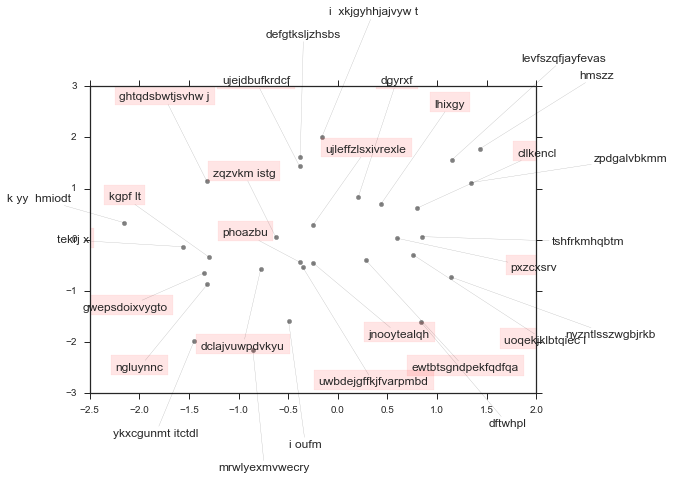

In [13]:
anchor_x = data[:, 0]
anchor_y = data[:, 1]

plt.figure()
ax = plt.gca()
ax.scatter(anchor_x, anchor_y, color='grey')




anchors, anchors_transformed, axes_bbox, label_bboxes, other_bboxes, text_strings = _initialise(ax, anchor_x,
                                                                               anchor_y, labels,
                                                                               padding)

initial = spring_layout_initialisation(anchors_transformed, k=0.15)
# np.zeros(len(label_bboxes) * 2)

_draw_annotations(ax, anchors, initial.reshape(-1, 2), text_strings, label_bboxes, 
                  padding=padding,
                  draw_bboxes=True)
plt.draw()

Finding best placements: 0it [00:00, ?it/s]/Users/saulius/.virtualenvs/scientific-py3/lib/python3.4/site-packages/networkx/drawing/layout.py:330: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pos==None:
Finding best placements: 7it [01:03, 10.29s/it]


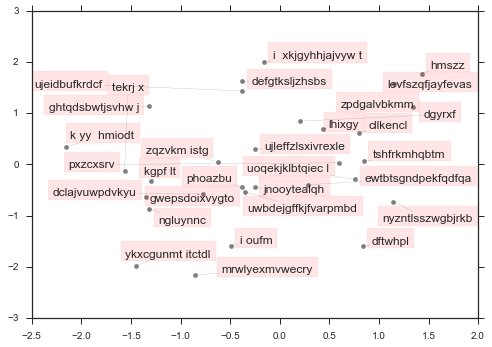

In [14]:
anchor_x = data[:, 0]
anchor_y = data[:, 1]

plt.figure()
ax = plt.gca()
ax.scatter(anchor_x, anchor_y, color='grey')

anchors, anchors_transformed, axes_bbox, label_bboxes, other_bboxes, text_strings = _initialise(ax, anchor_x,
                                                                               anchor_y, labels,
                                                                               padding)





debug = []
    
offsets, results = _find_label_offsets(label_bboxes,
                                       anchors_transformed,
                                       other_bboxes,
                                       axes_bbox,
                                       maxfev=MAXFEV,
                                       minimise_callback=lambda x,y,z: debug.append((x,y, z)))

_draw_annotations(ax, anchors, offsets, text_strings, label_bboxes, draw_bboxes=True, padding=padding)

In [8]:
list(enumerate(text_strings))

[(0, 'ewtbtsgndpekfqdfqa'),
 (1, 'dclajvuwpdvkyu'),
 (2, 'i oufm'),
 (3, 'phoazbu'),
 (4, 'uwbdejgffkjfvarpmbd'),
 (5, 'zpdgalvbkmm'),
 (6, 'hmszz'),
 (7, 'pxzcxsrv'),
 (8, 'zqzvkm istg'),
 (9, 'levfszqfjayfevas'),
 (10, 'ujleffzlsxivrexle'),
 (11, 'k yy  hmiodt'),
 (12, 'ghtqdsbwtjsvhw j'),
 (13, 'jnooytealqh'),
 (14, 'gwepsdoixvygto'),
 (15, 'uoqekjklbtqiec l'),
 (16, 'tekrj x'),
 (17, 'nyzntlsszwgbjrkb'),
 (18, 'defgtksljzhsbs'),
 (19, 'mrwlyexmvwecry'),
 (20, 'tshfrkmhqbtm'),
 (21, 'dftwhpl'),
 (22, 'ngluynnc'),
 (23, 'dgyrxf'),
 (24, 'cllkencl'),
 (25, 'kgpf lt'),
 (26, 'ykxcgunmt itctdl'),
 (27, 'lhixgy'),
 (28, 'i  xkjgyhhjajvyw t'),
 (29, 'ujeidbufkrdcf')]

In [9]:
results

   direc: array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])
     fun: 75215.446471110918
 message: 'Maximum number of function evaluations has been exceeded.'
    nfev: 11598
     nit: 7
  status: 1
 success: False
       x: array([  6.26295477e+01,   6.16994309e+00,  -1.66842012e+02,
         3.80811182e+00,   1.00000000e+01,   7.85102979e+00,
        -4.81773167e+01,   5.02623467e+01,   2.24159099e+01,
        -1.70059670e+01,  -5.89328940e+01,  -1.52033121e-01,
         1.00000000e+01,   7.02690242e+00,  -1.96847625e+02,
         1.76997937e+00,   5.45976225e+01,  -5.65405626e+00,
        -9.22538844e+00,  -3.73838296e+00,   1.00000000e+01,
         2.42590420e+00,   1.00000000e+01,   7.85102979e+00,
         1.00000000e+01,  -1.03975289e+01,   2.72234423e+01

In [10]:
debug_split = list(zip(*debug))

energies_df = pd.DataFrame(list(debug_split[1]))
total_energies = pd.Series(list(debug_split[2]), name='Total Energy')

energies_df = energies_df.join(total_energies)

In [11]:
energies_df

,distances_to_anchor,n_intersecting_lines,n_overlaps,non_label_overlap_area,out_of_axes_area,overlap_area,Total Energy
0,0.000000,0,29,4630.643528,14192.612938,14378.957399,1.990726e+06
1,64930.539375,2,15,894.538054,0.000000,2302.559541,1.599628e+05
2,101244.593265,0,4,848.178103,0.000000,422.885797,8.837504e+04
3,90239.756730,0,2,841.552047,0.000000,326.682645,8.176838e+04
4,87065.283003,0,2,840.710455,0.000000,248.760834,7.796612e+04
5,87093.200752,0,2,838.440965,0.000000,226.920011,7.696190e+04
6,87148.850945,0,2,838.123074,0.000000,205.203546,7.608530e+04
7,87221.448650,0,2,838.120274,0.000000,183.098507,7.521545e+04


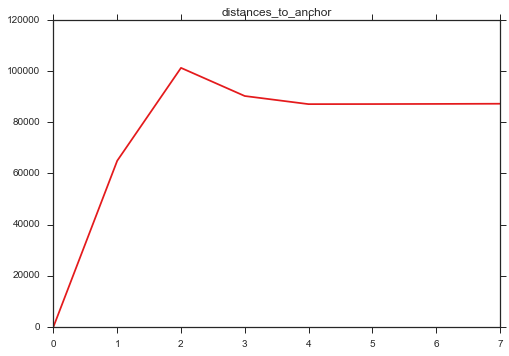

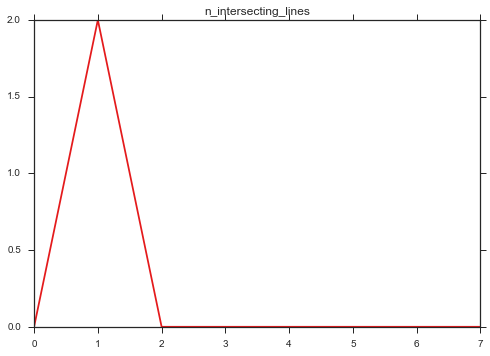

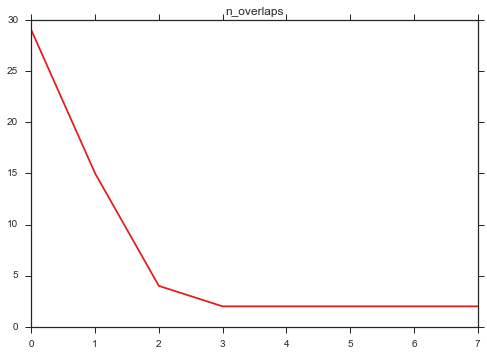

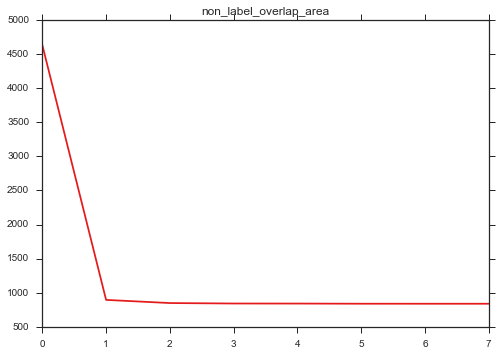

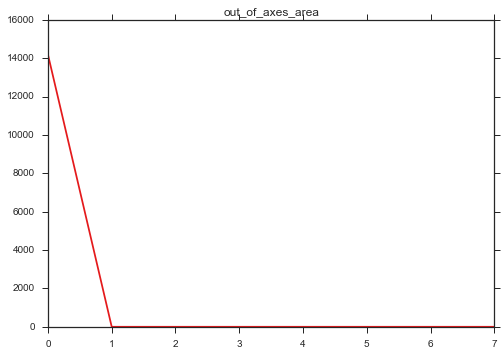

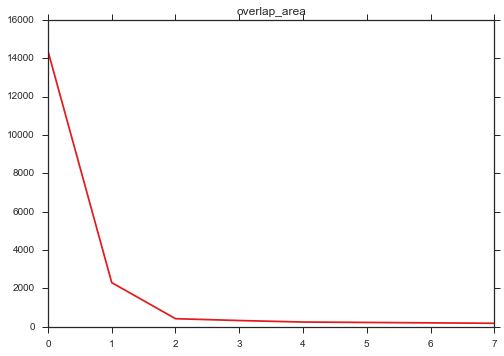

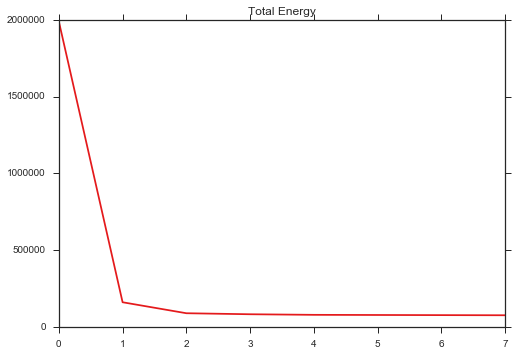

In [12]:
for column in energies_df:
    plt.figure()
    energies_df[column].plot(title=column)